In [8]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [40]:
import requests
import json
import pandas as pd
import numpy as np
import plotly.express as px
from config import g_key
from config import mapbox_key
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv("../Data/Weather_data.csv")
df.head()

,City,Country,Lat,Long,Temp,Feel Like,Wind Speed,Humidity,Cloud %
0,Hambantota,LK,6.12,81.12,86.00,89.56,16.11,79,40
1,Shimoda,JP,34.67,138.95,68.14,59.52,18.34,64,75
2,Makubetsu,JP,45.37,141.82,68.00,58.42,21.92,72,75
3,Kikwit,CD,-5.04,18.82,71.24,77.83,1.34,94,100
4,Koutsouras,GR,35.03,25.95,75.00,82.83,1.99,92,2


In [11]:
vacation_df = df.loc[
    (df["Cloud %"] < 10)
    & (df["Wind Speed"] < 10)
    & (df["Temp"] > 70)
    & (df["Temp"] < 80)
]

In [12]:
vacation_df["Hotel"] = ""

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
for i in vacation_df.index:

    lat = vacation_df.loc[i, "Lat"]

    lng = vacation_df.loc[i, "Long"]

    lat_lng_str = str(lat) + "," + str(lng)

    try:
        r = requests.get(
            "https://maps.googleapis.com/maps/api/place/nearbysearch/json",
            params={
                "location": lat_lng_str,
                "radius": 5000,
                "type": "lodging",
                "key": g_key,
            },
        )
        vacation_df.loc[i, "Hotel"] = r.json()["results"][0]["name"]
    except:
        pass

In [30]:
vacation_df = vacation_df[vacation_df.Hotel != ""]

In [31]:
vacation_df = vacation_df.loc[vacation_df["Feel Like"] < 80]

In [32]:
vacation_df

,City,Country,Lat,Long,Temp,Feel Like,Wind Speed,Humidity,Cloud %,Hotel
84,San Quintín,MX,30.48,-115.95,72.43,71.42,9.04,70,0,Old Mill Hotel
94,Riyadh,SA,24.69,46.72,78.80,73.08,6.93,27,0,InterContinental Riyadh
192,Sancti Spíritus,CU,21.93,-79.44,73.72,79.70,4.38,93,8,Hostal El Parque
208,Airai,TL,-8.93,125.41,79.70,78.49,5.01,43,2,Juvinal Martin
229,San Ramon,US,37.78,-121.98,73.71,68.31,3.36,22,1,San Ramon Marriott
256,Laguna,US,38.42,-121.42,74.93,72.14,4.61,40,1,Holiday Inn Express & Suites Elk Grove Central...
271,Ţahţā,EG,26.77,31.50,78.71,74.39,5.82,31,0,Møhãmęd Tãręk 🏠
417,Kulu,TR,39.10,33.08,72.81,69.03,5.50,40,0,Kapadokya Motel
436,Morondava,MG,-20.28,44.28,77.47,77.74,4.34,52,0,La Case Bambou
439,Ceres,US,37.59,-120.96,74.43,73.45,3.31,47,1,Howard Johnson by Wyndham Modesto Ceres


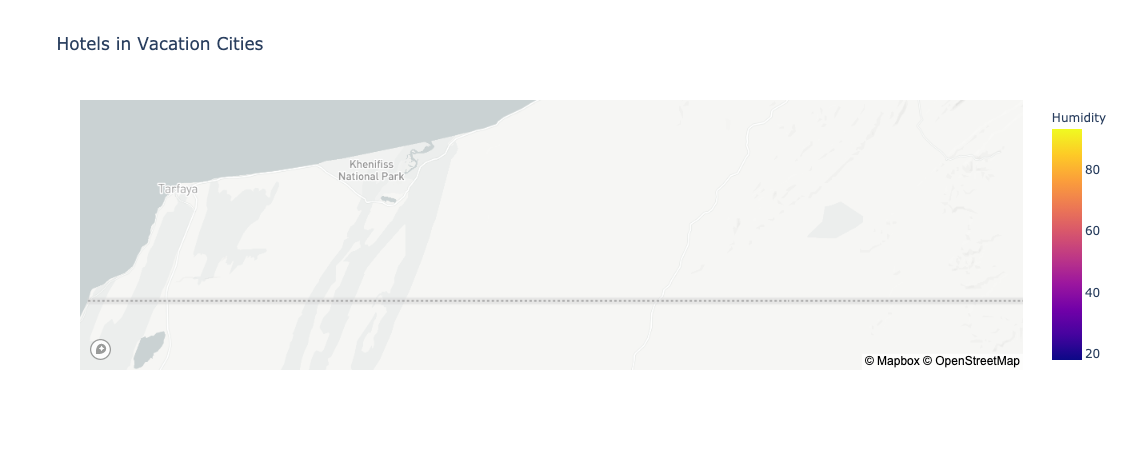

In [42]:
px.set_mapbox_access_token(mapbox_key)
fig = px.scatter_mapbox(
    vacation_df,
    lat="Lat",
    lon="Long",
    color="Humidity",
    hover_data=["Hotel", "City", "Country"],
    title=(f"Hotels in Vacation Cities"),
)

fig.show()